In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import itertools
from sklearn.cluster import KMeans

First, I will set up the my dataframe with total electricity demand as well as component energy demand for six locations spread throughout the United States(Florida, Texas, California, Arizona, Pennsylvania, and New York). I will also compare with solar irradiation data using the total meteorological year (TMY) at each of these locations as well to evaluate the potential of solar pv throughout different regions.

In [2]:
f = open('C:/Users/rgrahn/F16-12-752/lectures/data/Energy Data final project/Generation/Arizona.csv')
g = open('C:/Users/rgrahn/F16-12-752/lectures/data/Energy Data final project/Load/Arizona_Load.csv')
f1 = open('C:/Users/rgrahn/F16-12-752/lectures/data/Energy Data final project/Generation/California.csv')
g1 = open('C:/Users/rgrahn/F16-12-752/lectures/data/Energy Data final project/Load/California_Load.csv')
f2 = open('C:/Users/rgrahn/F16-12-752/lectures/data/Energy Data final project/Generation/Florida.csv')
g2 = open('C:/Users/rgrahn/F16-12-752/lectures/data/Energy Data final project/Load/Florida_Load.csv')
f3 = open('C:/Users/rgrahn/F16-12-752/lectures/data/Energy Data final project/Generation/Newyork.csv')
g3 = open('C:/Users/rgrahn/F16-12-752/lectures/data/Energy Data final project/Load/Newyork_Load.csv')
f4 = open('C:/Users/rgrahn/F16-12-752/lectures/data/Energy Data final project/Generation/Pittsburgh.csv')
g4 = open('C:/Users/rgrahn/F16-12-752/lectures/data/Energy Data final project/Load/Pittsburgh_Load.csv')
f5 = open('C:/Users/rgrahn/F16-12-752/lectures/data/Energy Data final project/Generation/Texas.csv')
g5 = open('C:/Users/rgrahn/F16-12-752/lectures/data/Energy Data final project/Load/Texas_Load.csv')
data_gen = pd.read_csv(f,sep=',', header='infer', parse_dates=[0])
data_gen1 = pd.read_csv(f1,sep=',', header='infer', parse_dates=[0])
data_gen2 = pd.read_csv(f2,sep=',', header='infer', parse_dates=[0])
data_gen3 = pd.read_csv(f3,sep=',', header='infer', parse_dates=[0])
data_gen4 = pd.read_csv(f4,sep=',', header='infer', parse_dates=[0])
data_gen5 = pd.read_csv(f5,sep=',', header='infer', parse_dates=[0])
data_load = pd.read_csv(g,sep=',', header='infer', parse_dates=[0])
data_load1 = pd.read_csv(g1,sep=',', header='infer', parse_dates=[0])
data_load2 = pd.read_csv(g2,sep=',', header='infer', parse_dates=[0])
data_load3 = pd.read_csv(g3,sep=',', header='infer', parse_dates=[0])
data_load4 = pd.read_csv(g4,sep=',', header='infer', parse_dates=[0])
data_load5 = pd.read_csv(g5,sep=',', header='infer', parse_dates=[0])

year = pd.date_range('1/1/2000', periods=(24*365), freq='H')

#setting up arrays to drop columns from the load and generation files that I am not intersted in
del_array = [0,1]
del_array.extend(range(4,16))
del_array1 = [0,2,3,4,7,8]

#dropping all columns used to calculate the power output from the solar panel.
#only interested in the actual output of the solar panel
data_gen = data_gen.drop(data_gen.columns[[del_array]],axis=1)
data_load = data_load.drop(data_load.columns[[del_array1]],axis=1)
data_gen = data_gen.set_index(year)
data_load = data_load.set_index(year)

#data for Arizona started a few hours later that all other datasets so I shifted it up
data_gen.power = data_gen.power.shift(-4)
data_gen = data_gen.fillna(0)

#Setting up the dataframe and renaming all the columns in a very inefficient way
data_gen = data_gen.rename(columns={"power":"power_AZ"})
data_load = data_load.rename(columns={"Electricity:Facility [kW](Hourly)":"AZ_Elec","Cooling:Electricity [kW](Hourly)":
                                     "AZ_Cooling","HVACFan:Fans:Electricity [kW](Hourly)":"AZ_fan",
                                     "General:InteriorLights:Electricity [kW](Hourly)":"AZ_Int",
                                     "General:ExteriorLights:Electricity [kW](Hourly)":"AZ_Ext",
                                     "Appl:InteriorEquipment:Electricity [kW](Hourly)":"AZ_App",
                                     "Misc:InteriorEquipment:Electricity [kW](Hourly)":"AZ_Misc",
                                     "Water Heater:WaterSystems:Gas [kW](Hourly)":"AZ_wh"})

data_load['CA_Elec'] = np.array(data_load1['Electricity:Facility [kW](Hourly)'])
data_load['CA_Cooling'] = np.array(data_load1['Cooling:Electricity [kW](Hourly)'])
data_load['CA_fan'] = np.array(data_load1['HVACFan:Fans:Electricity [kW](Hourly)'])
data_load['CA_Int'] = np.array(data_load1['General:InteriorLights:Electricity [kW](Hourly)'])
data_load['CA_Ext'] = np.array(data_load1['Cooling:Electricity [kW](Hourly)'])
data_load['CA_App'] = np.array(data_load1['Cooling:Electricity [kW](Hourly)'])
data_load['CA_Misc'] = np.array(data_load1['Misc:InteriorEquipment:Electricity [kW](Hourly)'])
data_load['FL_Elec'] = np.array(data_load2['Electricity:Facility [kW](Hourly)'])
data_load['FL_Cooling'] = np.array(data_load2['Cooling:Electricity [kW](Hourly)'])
data_load['FL_fan'] = np.array(data_load2['HVACFan:Fans:Electricity [kW](Hourly)'])
data_load['FL_Int'] = np.array(data_load2['General:InteriorLights:Electricity [kW](Hourly)'])
data_load['FL_Ext'] = np.array(data_load2['Cooling:Electricity [kW](Hourly)'])
data_load['FL_App'] = np.array(data_load2['Cooling:Electricity [kW](Hourly)'])
data_load['FL_Misc'] = np.array(data_load2['Misc:InteriorEquipment:Electricity [kW](Hourly)'])
data_load['FL_wh'] = np.array(data_load2['Water Heater:WaterSystems:Electricity [kW](Hourly) '])
data_load['NY_Elec'] = np.array(data_load3['Electricity:Facility [kW](Hourly)'])
data_load['NY_Cooling'] = np.array(data_load3['Cooling:Electricity [kW](Hourly)'])
data_load['NY_fan'] = np.array(data_load3['HVACFan:Fans:Electricity [kW](Hourly)'])
data_load['NY_Int'] = np.array(data_load3['General:InteriorLights:Electricity [kW](Hourly)'])
data_load['NY_Ext'] = np.array(data_load3['Cooling:Electricity [kW](Hourly)'])
data_load['NY_App'] = np.array(data_load3['Cooling:Electricity [kW](Hourly)'])
data_load['NY_Misc'] = np.array(data_load3['Misc:InteriorEquipment:Electricity [kW](Hourly)'])
data_load['NY_wh'] = np.array(data_load3['Water Heater:WaterSystems:Electricity [kW](Hourly) '])
data_load['PA_Elec'] = np.array(data_load4['Electricity:Facility [kW](Hourly)'])
data_load['PA_Cooling'] = np.array(data_load4['Cooling:Electricity [kW](Hourly)'])
data_load['PA_fan'] = np.array(data_load4['HVACFan:Fans:Electricity [kW](Hourly)'])
data_load['PA_Int'] = np.array(data_load4['General:InteriorLights:Electricity [kW](Hourly)'])
data_load['PA_Ext'] = np.array(data_load4['Cooling:Electricity [kW](Hourly)'])
data_load['PA_App'] = np.array(data_load4['Cooling:Electricity [kW](Hourly)'])
data_load['PA_Misc'] = np.array(data_load4['Misc:InteriorEquipment:Electricity [kW](Hourly)'])
data_load['TX_Elec'] = np.array(data_load5['Electricity:Facility [kW](Hourly)'])
data_load['TX_Cooling'] = np.array(data_load5['Cooling:Electricity [kW](Hourly)'])
data_load['TX_fan'] = np.array(data_load5['HVACFan:Fans:Electricity [kW](Hourly)'])
data_load['TX_Int'] = np.array(data_load5['General:InteriorLights:Electricity [kW](Hourly)'])
data_load['TX_Ext'] = np.array(data_load5['Cooling:Electricity [kW](Hourly)'])
data_load['TX_App'] = np.array(data_load5['Cooling:Electricity [kW](Hourly)'])
data_load['TX_Misc'] = np.array(data_load5['Misc:InteriorEquipment:Electricity [kW](Hourly)'])

#converting my solar irradiation to kW/m^2 
data_gen['power_AZ'] = data_gen['power_AZ'] * 1000
data_gen['power_CA'] = np.array(data_gen1['power'])*1000
data_gen['power_FL'] = np.array(data_gen2['power'])*1000
data_gen['power_NY'] = np.array(data_gen3['power'])*1000
data_gen['power_PA'] = np.array(data_gen4['power'])*1000
data_gen['power_TX'] = np.array(data_gen5['power'])*1000

frames = [data_gen,data_load]
df = pd.concat(frames, axis=1)


Now that my dataframe is set up, I will try to visualize some of the data to see what is important/interesting. I am interested in the load profiles for a given day so I averaged each hour over the entire year. The large variance in cooling loads indicate that the length of cooling seasons and peak cooling loads vary quite a bit. From the last figure, it is clear that the power from hvac fans in the homes in the northeast (PA,NY) follow very different load curves. This might be due to the presence of central air vs. window ac units.

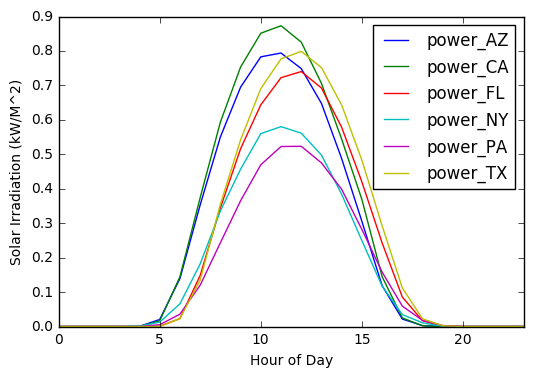

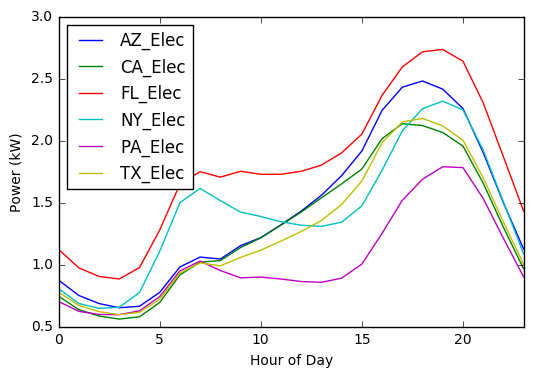

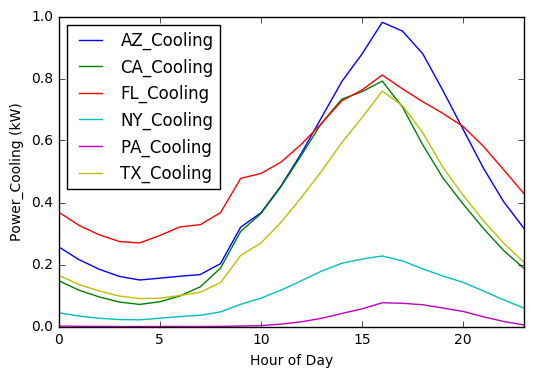

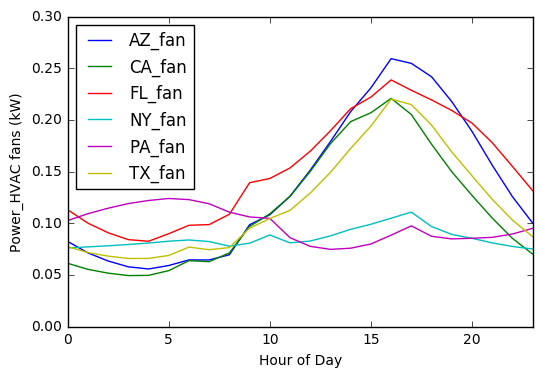

In [45]:
#Mean annual solar irradiation data by location
plt.figure(1)
mean_vals = df.groupby("hour").mean()
mean_vals.plot(y=['power_AZ','power_CA','power_FL','power_NY','power_PA','power_TX'])
plt.xlabel("Hour of Day")
plt.ylabel("Solar Irradiation (kW/M^2)")
plt.show(1)
#typical load curve for each location. Notice the high early peaks for Florida and New York. These are the two locations
#using electric water heating as opposed to gas
plt.figure(2)
mean_vals.plot(y=['AZ_Elec','CA_Elec','FL_Elec','NY_Elec','PA_Elec','TX_Elec'])
plt.xlabel("Hour of Day")
plt.ylabel("Power (kW)")
plt.show(2)
#cooling loads vary by climate. Pretty obvious.
plt.figure(3)
mean_vals.plot(y=['AZ_Cooling','CA_Cooling','FL_Cooling','NY_Cooling','PA_Cooling','TX_Cooling'])
plt.xlabel("Hour of Day")
plt.ylabel("Power_Cooling (kW)")
plt.show(3)
#HVAC fan loading. Small percentage of overall electric load but it is interesting the see the differences by region.
plt.figure(4)
mean_vals.plot(y=['AZ_fan','CA_fan','FL_fan','NY_fan','PA_fan','TX_fan'])
plt.xlabel("Hour of Day")
plt.ylabel("Power_HVAC fans (kW)")
plt.show(4)


I am not interested in how a solar pv system might supply power to reduce the total energy demand for the year.

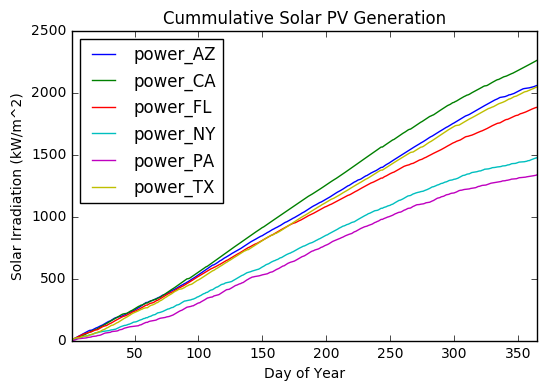

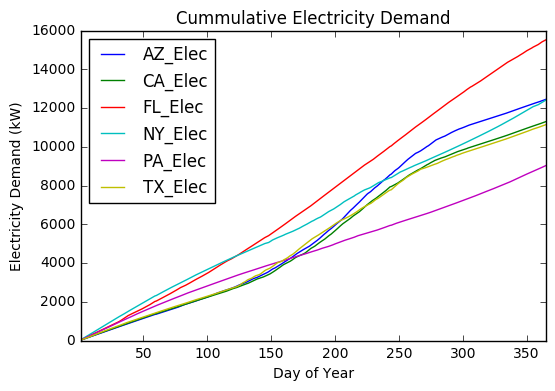

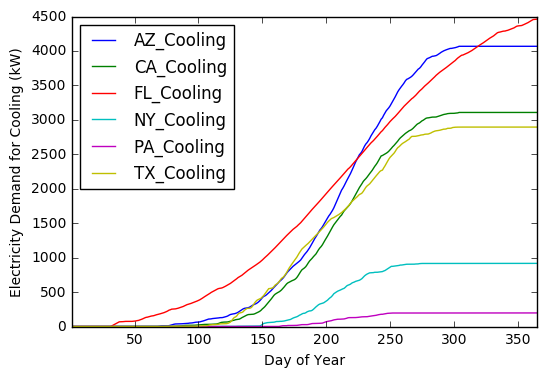

In [4]:
#had to groupby the day of year to take the mean to try and speed up the cumsum function of pandas.
#This is the cummulative solar generation potential by location measured by solar radiation (kW/m^2)
plt.figure(1)
cs = df.groupby('doy').mean() * 24
cs = cs.cumsum(axis=0)
cs.plot(y=['power_AZ','power_CA','power_FL','power_NY','power_PA','power_TX'])
plt.ylabel('Solar Irradiation (kW/m^2)')
plt.xlabel('Day of Year')
plt.title('Cummulative Solar PV Generation')
plt.show(1)
#This is the cummulative energy demand plot by location.  Notice how the dry, hot southwest climates have very steep
#slopes during the summer months indicating the high cooling loads
plt.figure(2)
cs.plot(y=['AZ_Elec','CA_Elec','FL_Elec','NY_Elec','PA_Elec','TX_Elec'])
plt.ylabel('Electricity Demand (kW)')
plt.xlabel('Day of Year')
plt.title('Cummulative Electricity Demand')
plt.show(2)
#This is the plot showing just the cummulative cooling loads over the course of a year.
plt.figure(3)
cs.plot(y=['AZ_Cooling','CA_Cooling','FL_Cooling','NY_Cooling','PA_Cooling','TX_Cooling'])
plt.ylabel('Electricity Demand for Cooling (kW)')
plt.xlabel('Day of Year')
plt.show('Cummulative Cooling Electricity Demand')
plt.show(3)


To size the pv array, I just looked at the peak electric load for the year.  The solar irradiance is in kW/m^2 and efficiency losses due to the panels will have to be considered when actually designing a pv system.  For our purposes, we do not need to consider these efficiency losses because the losses can be considered when actually sizing the system in square meters. The actual size of the system will need to be roughly 5-7times (m^2) the values we determine below due to the inefficiencies of the panels.

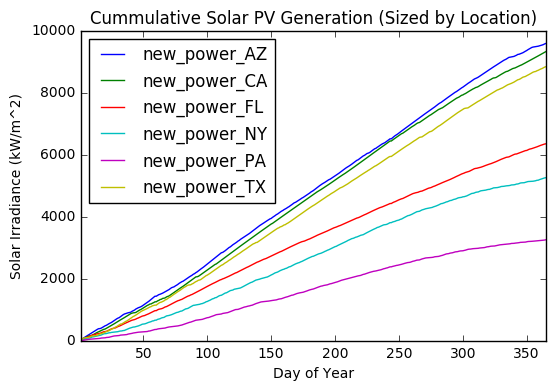

In [5]:
#Lets calculate the size in square meters of a solar array to meet the peak needs of a customer in the different locations
az_max,ca_max,fl_max,ny_max,pa_max,tx_max = df[['AZ_Elec','CA_Elec','FL_Elec','NY_Elec','PA_Elec','TX_Elec']].max()

#now I will multiply the solar generation values by these factors
df['new_power_AZ'] = df['power_AZ'].multiply(az_max)
df['new_power_CA'] = df['power_CA'].multiply(ca_max)
df['new_power_FL'] = df['power_FL'].multiply(fl_max)
df['new_power_NY'] = df['power_NY'].multiply(ny_max)
df['new_power_PA'] = df['power_PA'].multiply(pa_max)
df['new_power_TX'] = df['power_TX'].multiply(tx_max)
#this cummulative graph represents the new solar irradiance by making the panel systems larger
plt.figure(1)
cs2 = df.groupby('doy').mean() * 24
cs2 = cs2.cumsum(axis=0)
cs2.plot(y=['new_power_AZ','new_power_CA','new_power_FL','new_power_NY','new_power_PA','new_power_TX'])
plt.ylabel('Solar Irradiance (kW/m^2)')
plt.xlabel('Day of Year')
plt.title('Cummulative Solar PV Generation (Sized by Location)')
plt.show(1)

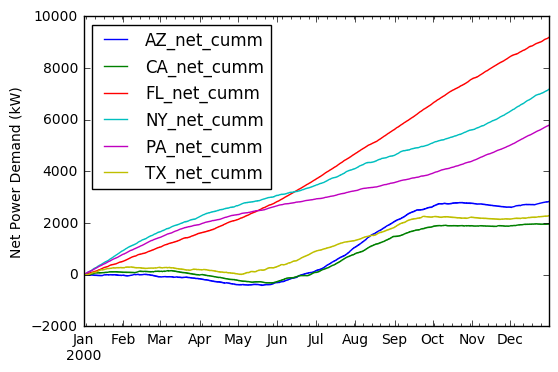

In [6]:
#Using the new sized solar pv systems, we can explore the effects of the solar pv system on the electricity demand for the 
#residential house (assuming adequate energy storage during the hours when solar generation exceeds electricity demand,
#this assumption is still a while off)

df['AZ_net'] = df['AZ_Elec']-df['new_power_AZ']
df['AZ_net_cumm'] = df['AZ_net'].cumsum(axis=0)
df['CA_net'] = df['CA_Elec']-df['new_power_CA']
df['CA_net_cumm'] = df['CA_net'].cumsum(axis=0)
df['FL_net'] = df['FL_Elec']-df['new_power_FL']
df['FL_net_cumm'] = df['FL_net'].cumsum(axis=0)
df['NY_net'] = df['NY_Elec']-df['new_power_NY']
df['NY_net_cumm'] = df['NY_net'].cumsum(axis=0)
df['PA_net'] = df['PA_Elec']-df['new_power_PA']
df['PA_net_cumm'] = df['PA_net'].cumsum(axis=0)
df['TX_net'] = df['TX_Elec']-df['new_power_TX']
df['TX_net_cumm'] = df['TX_net'].cumsum(axis=0)

plt.figure(1)
df.plot(y=['AZ_net_cumm','CA_net_cumm','FL_net_cumm','NY_net_cumm','PA_net_cumm','TX_net_cumm'])
plt.ylabel('Net Power Demand (kW)')
plt.show(1)

GIven appropriate storage, houses in the southwest can generate almost enough energy for the year without oversizing their pv systems.

Now we can take a look how the days of high solar generation vary across the regions as well as how the solar irradiation varies from season to season between the different regions.

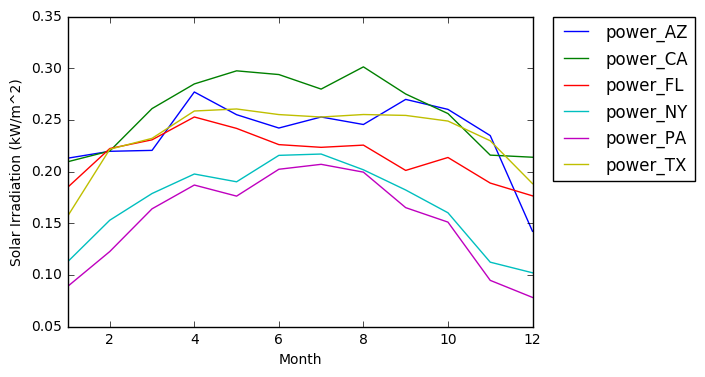

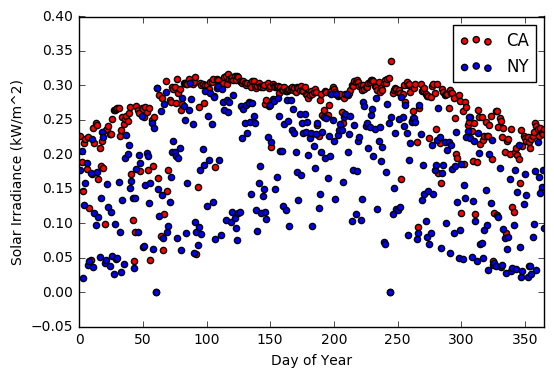

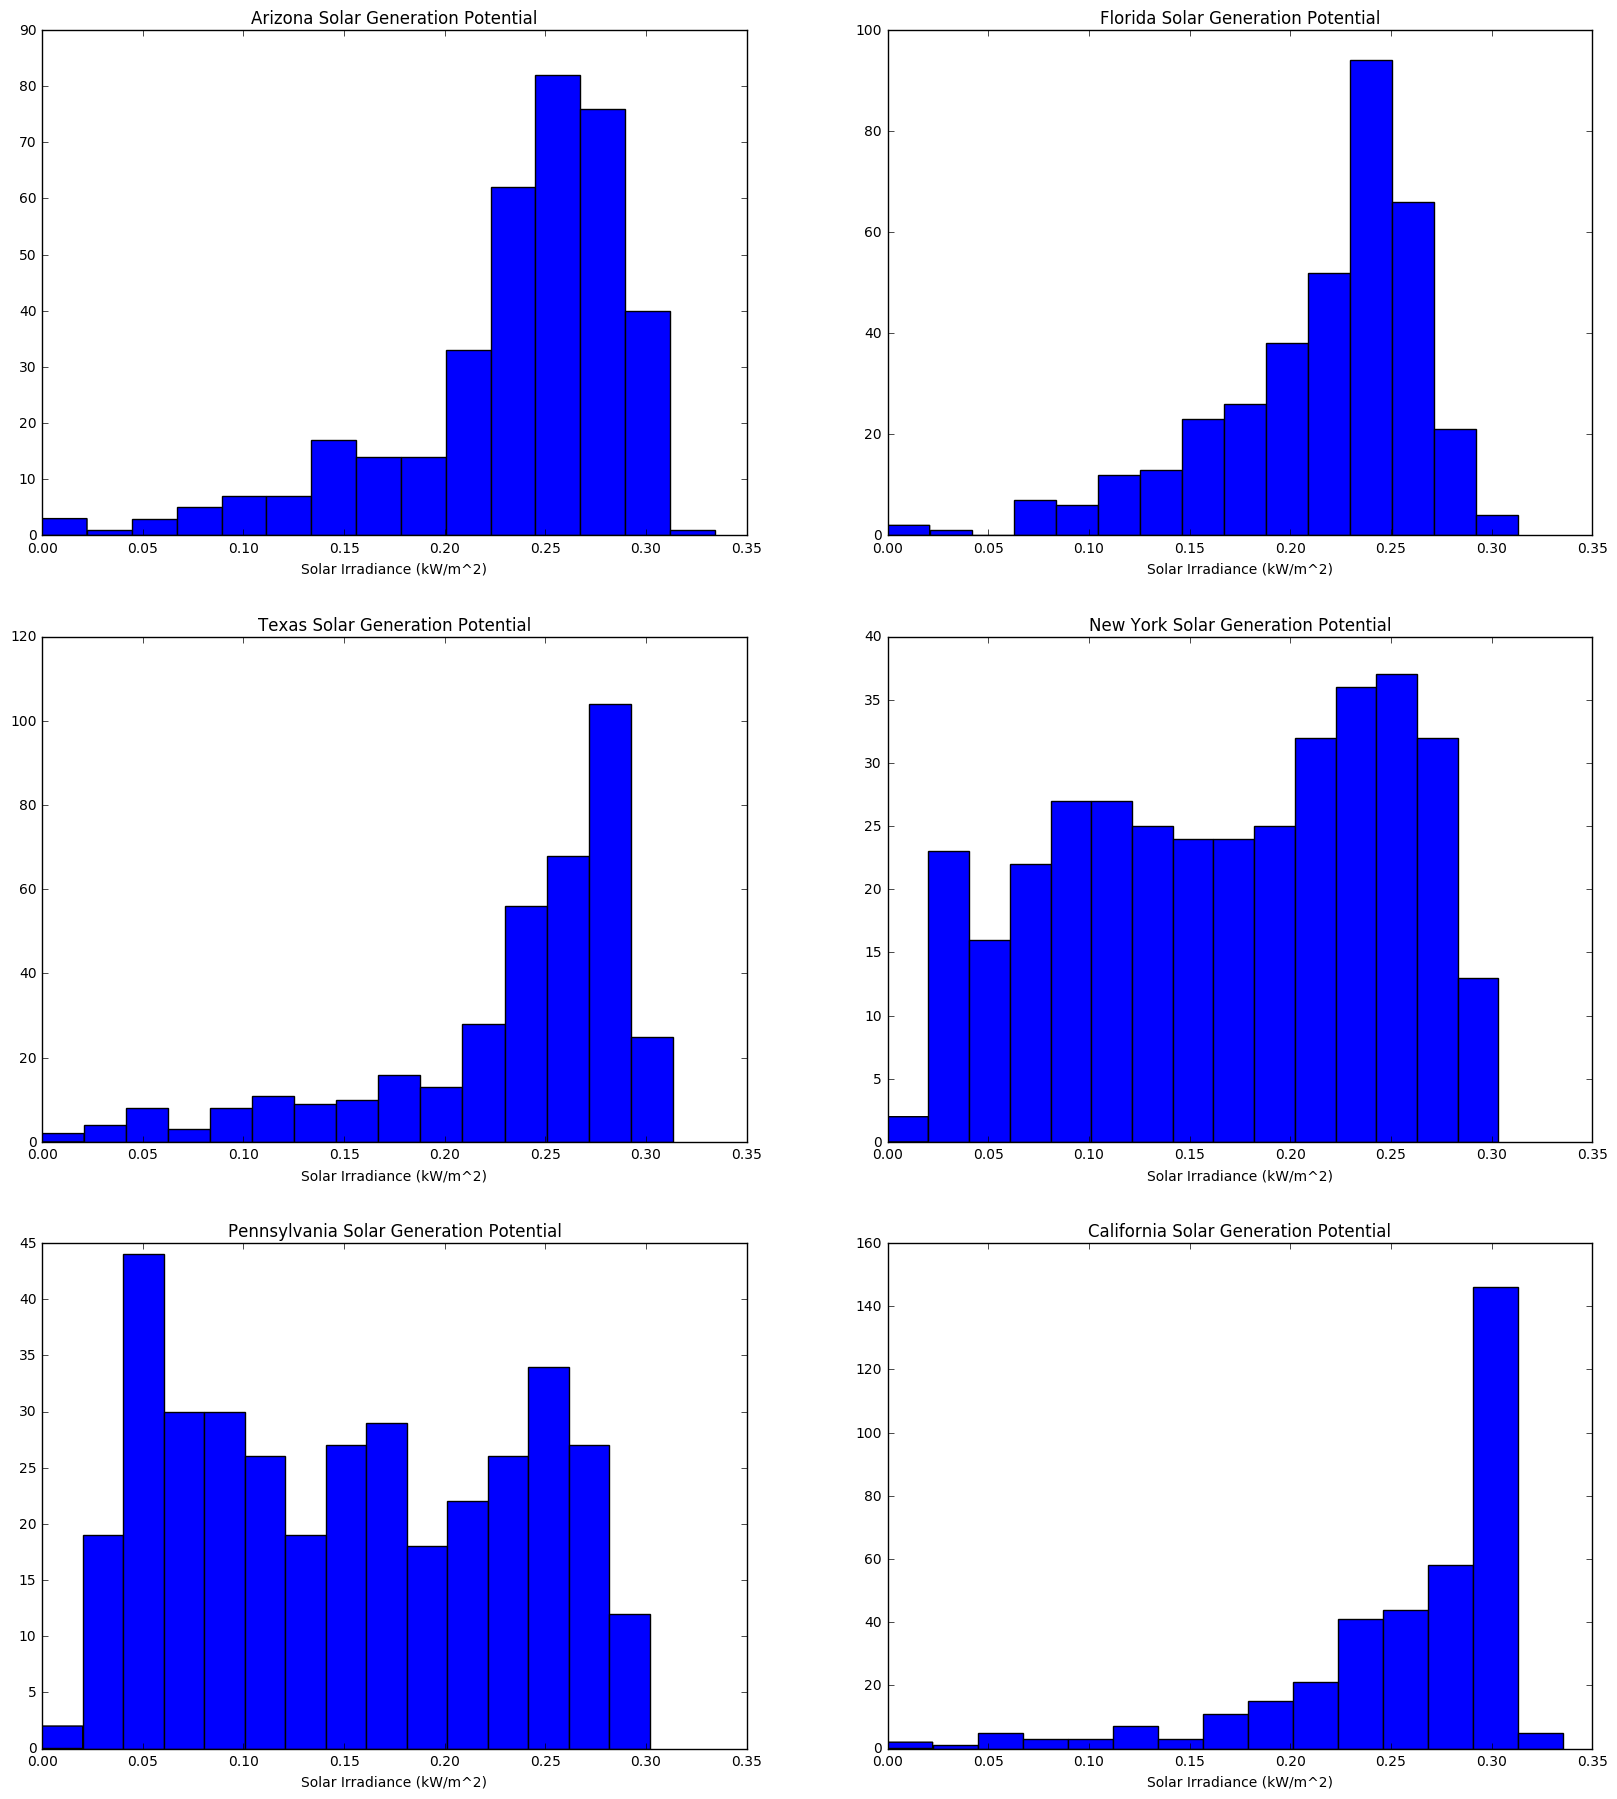

In [46]:
#This graph shows us how solar radiation varies per month.  This is important to understand times of the year solar output 
#might be lower and how to appropriately size a storage system.
plt.figure(1)
cm = df.groupby(df.index.month).mean()
cy = df.groupby('doy').mean()
cm.plot(y=['power_AZ','power_CA','power_FL','power_NY','power_PA','power_TX'])
plt.xlabel('Month')
plt.ylabel('Solar Irradiation (kW/m^2)')
plt.legend(borderaxespad=0,bbox_to_anchor=(1.35, 1))
plt.show(1)

az = np.array(cy['power_AZ'])
ny = np.array(cy['power_NY'])
fl = np.array(cy['power_FL'])
tx = np.array(cy['power_TX'])
pa = np.array(cy['power_PA'])
ca = np.array(cy['power_CA'])
f = range(1,366)

#Lets look at the two extremes on the same scatterplot in terms of annual solar irradiation. The red points represent California
#and the blue dots represent New York
plt.figure(3)
plt.scatter(f,ca,c='r',label='CA')
plt.scatter(f,ny,c='b',label='NY')
plt.xlabel('Day of Year')
plt.ylabel('Solar Irradiance (kW/m^2)')
plt.legend()
plt.xlim(0,365)
plt.show(3)
#The next six sublots are histograms of the solar generation potential by location. It will be intersting to see the spread of 
#values as well as the density.
plt.figure(4,figsize=(20,30))
plt.subplot(4,2,1)
plt.hist(az, bins=15)
plt.title('Arizona Solar Generation Potential')
plt.xlabel('Solar Irradiance (kW/m^2)')
plt.subplot(4,2,2)
plt.hist(fl,bins=15)
plt.title('Florida Solar Generation Potential')
plt.xlabel('Solar Irradiance (kW/m^2)')
plt.subplot(4,2,3)
plt.hist(tx,bins=15)
plt.title('Texas Solar Generation Potential')
plt.xlabel('Solar Irradiance (kW/m^2)')
plt.subplot(4,2,4)
plt.hist(ny,bins=15)
plt.title('New York Solar Generation Potential')
plt.xlabel('Solar Irradiance (kW/m^2)')
plt.subplot(4,2,5)
plt.hist(pa,bins=15)
plt.title('Pennsylvania Solar Generation Potential')
plt.xlabel('Solar Irradiance (kW/m^2)')
plt.subplot(4,2,6)
plt.hist(ca,bins=15)
plt.title('California Solar Generation Potential')
plt.xlabel('Solar Irradiance (kW/m^2)')
plt.show(4)


Lets look at how the electric demand varies from region to region

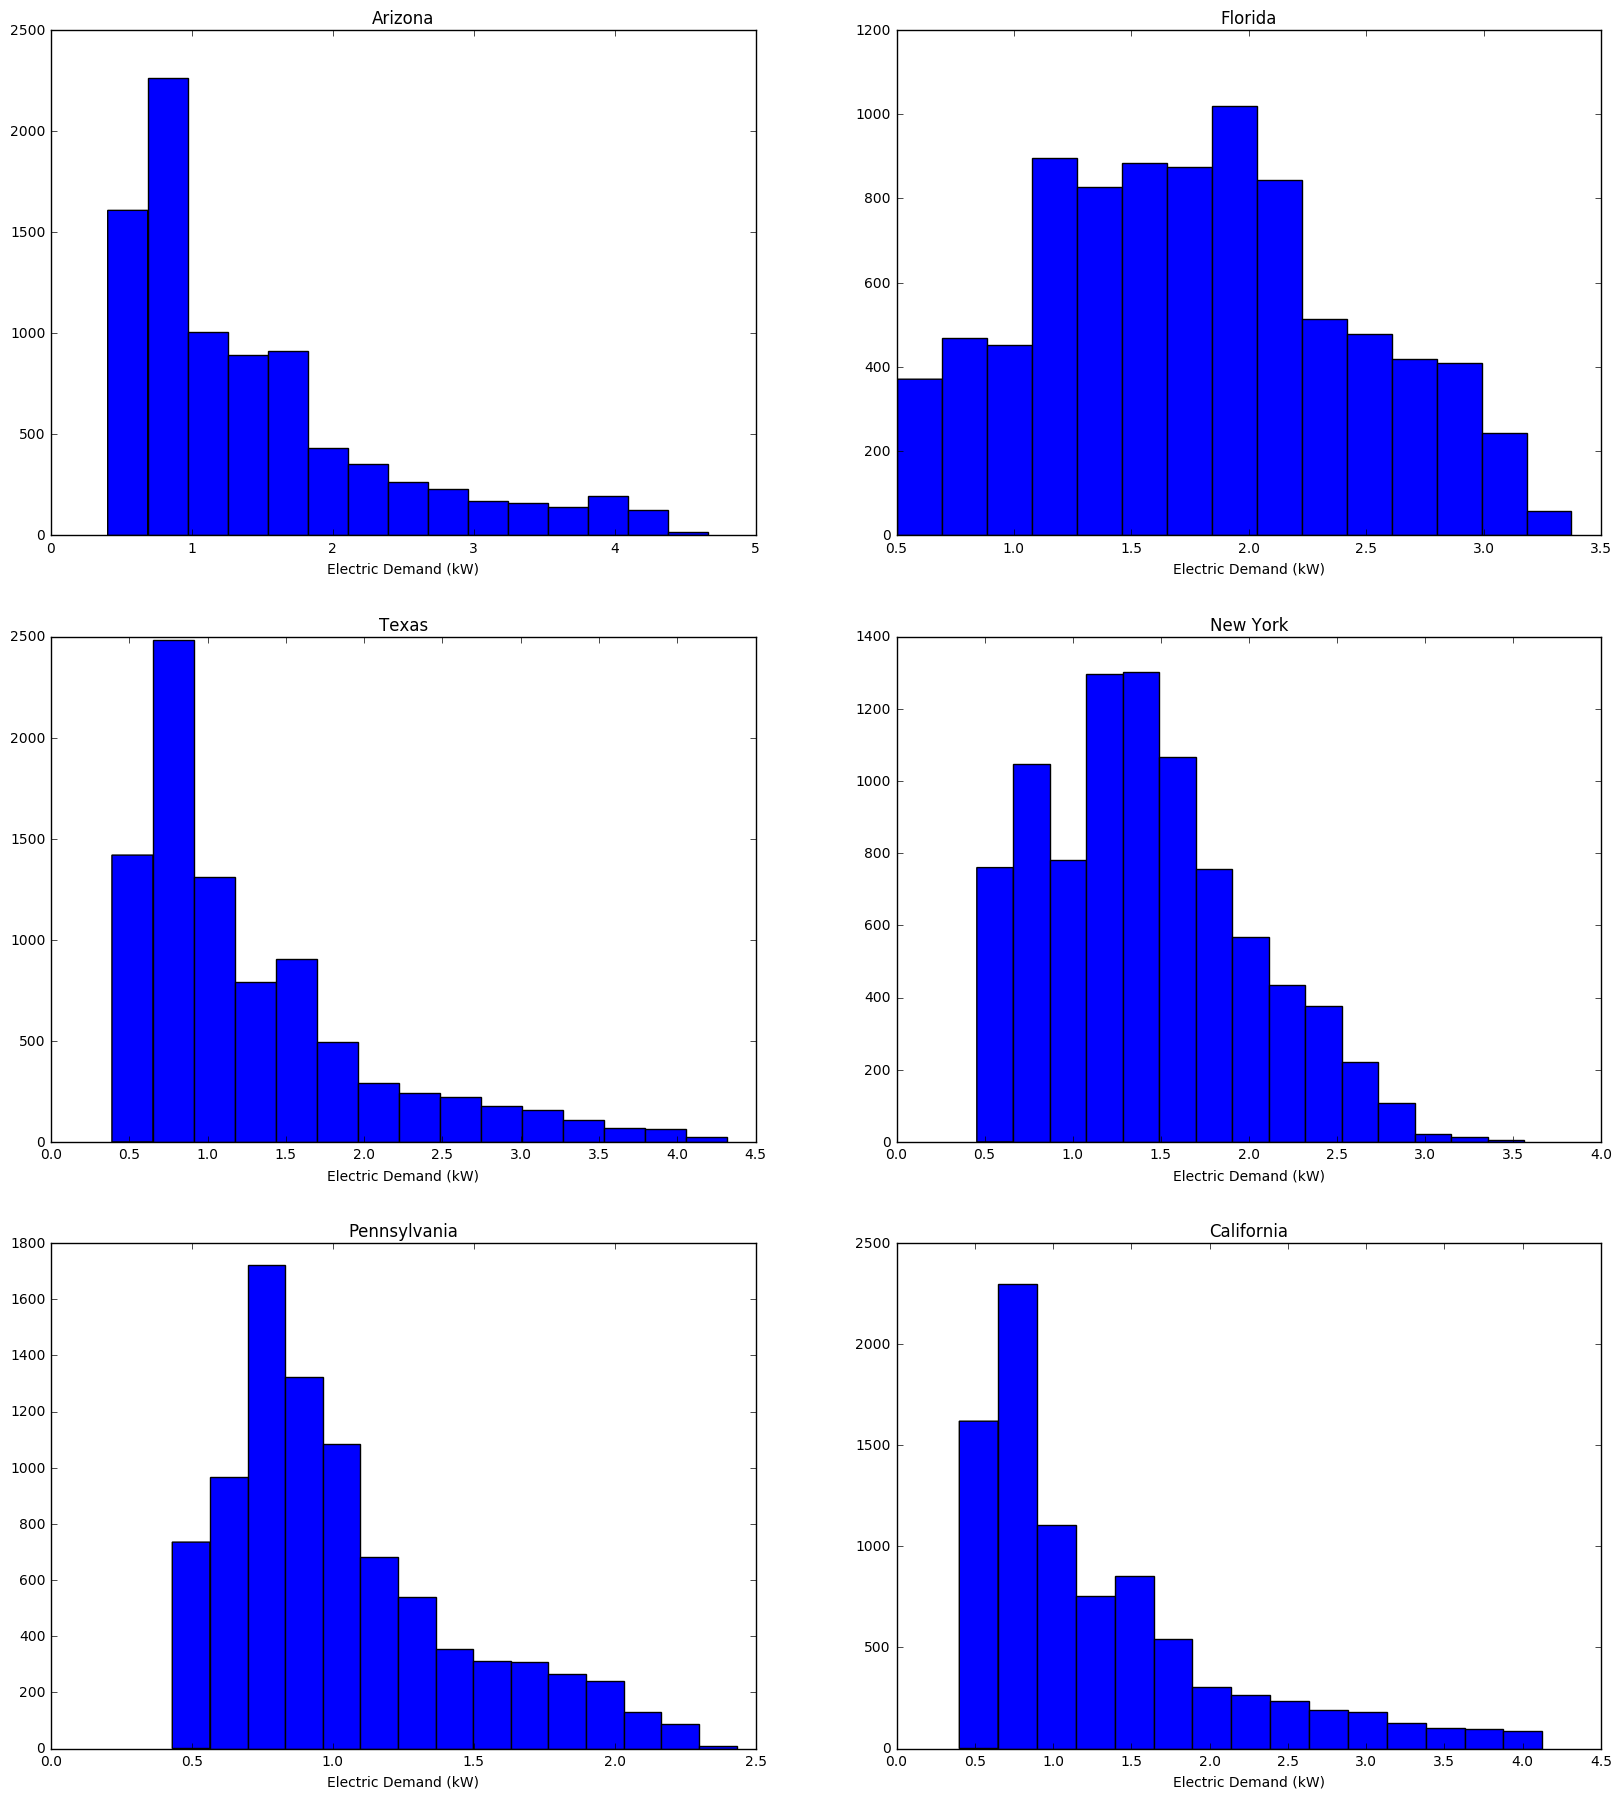

In [9]:
#The next six histograms will display the energy demand by region.
az1 = np.array(df['AZ_Elec'])
ny1 = np.array(df['NY_Elec'])
fl1 = np.array(df['FL_Elec'])
tx1 = np.array(df['TX_Elec'])
pa1 = np.array(df['PA_Elec'])
ca1 = np.array(df['CA_Elec'])

plt.figure(4,figsize=(20,30))
plt.subplot(4,2,1)
plt.hist(az1, bins=15)
plt.title('Arizona')
plt.xlabel('Electric Demand (kW)')
plt.subplot(4,2,2)
plt.hist(fl1,bins=15)
plt.title('Florida')
plt.xlabel('Electric Demand (kW)')
plt.subplot(4,2,3)
plt.hist(tx1,bins=15)
plt.title('Texas')
plt.xlabel('Electric Demand (kW)')
plt.subplot(4,2,4)
plt.hist(ny1,bins=15)
plt.title('New York')
plt.xlabel('Electric Demand (kW)')
plt.subplot(4,2,5)
plt.hist(pa1,bins=15)
plt.title('Pennsylvania')
plt.xlabel('Electric Demand (kW)')
plt.subplot(4,2,6)
plt.hist(ca1,bins=15)
plt.title('California')
plt.xlabel('Electric Demand (kW)')
plt.show(4)

Looks like the spread of energy demand per hour has a higher spread for the desert locations of California, Arizona, and Texas with hourly values near 4kW/h.

If industrial utility pricing schemes move to residential, it will be important to understand what factors into the peak demand for a day and to look at how we can reduce the peak demand.  To do this, we will need to break up the electricity load by component to see where we can shift loading to reduce the peak demand.

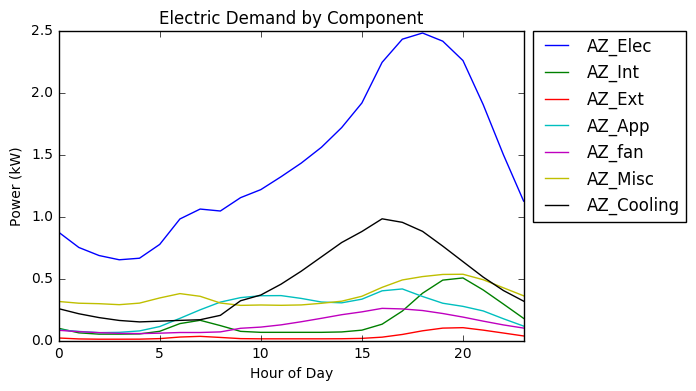

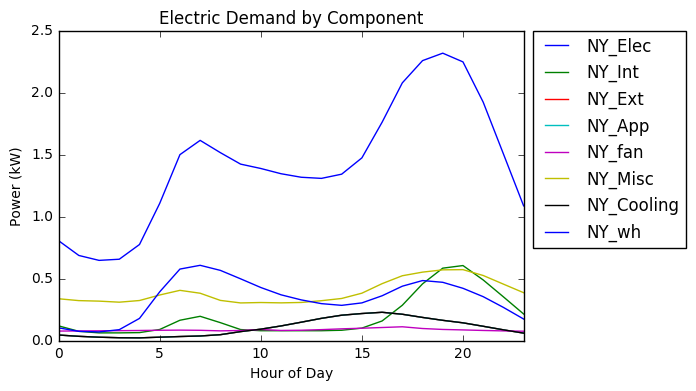

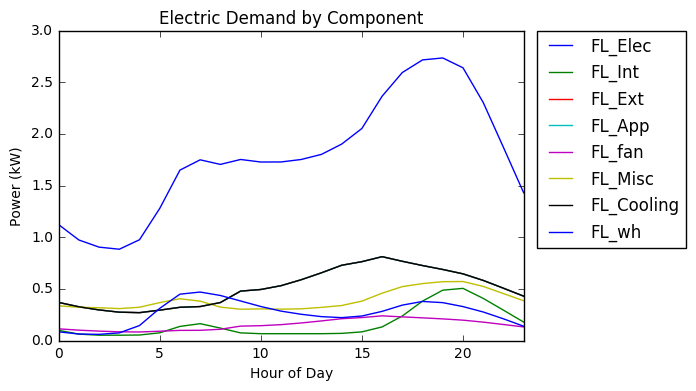

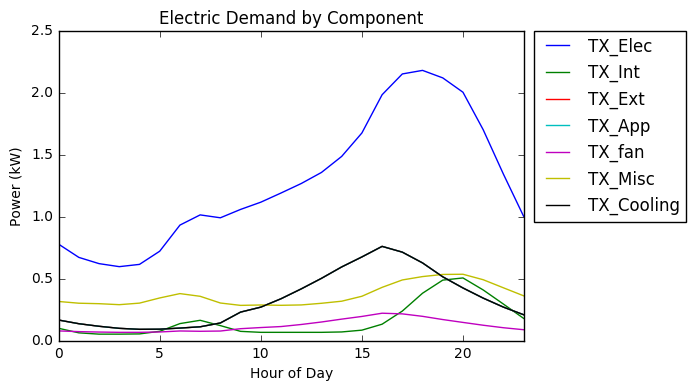

In [32]:
#Total energy demand by hour as well as component energy demand by hour for the year for Arizona
plt.figure(1)
mean_val = df.groupby("hour").mean()
mean_val.plot(y=['AZ_Elec','AZ_Int','AZ_Ext','AZ_App','AZ_fan','AZ_Misc','AZ_Cooling'])
plt.xlabel("Hour of Day")
plt.ylabel("Power (kW)")
plt.legend(borderaxespad=0,bbox_to_anchor=(1.35, 1))
plt.title('Electric Demand by Component')
plt.show(1)
#Total energy demand by hour as well as component energy demand by hour for the year for New York
plt.figure(2)
mean_val.plot(y=['NY_Elec','NY_Int','NY_Ext','NY_App','NY_fan','NY_Misc','NY_Cooling','NY_wh'])
plt.xlabel("Hour of Day")
plt.ylabel("Power (kW)")
plt.legend(borderaxespad=0,bbox_to_anchor=(1.35, 1))
plt.title('Electric Demand by Component')
plt.show(2)
#Total energy demand by hour as well as component energy demand by hour for the year for Florida
plt.figure(3,figsize=(60,80))
mean_val.plot(y=['FL_Elec','FL_Int','FL_Ext','FL_App','FL_fan','FL_Misc','FL_Cooling','FL_wh'])
plt.xlabel("Hour of Day")
plt.ylabel("Power (kW)")
plt.legend(borderaxespad=0,bbox_to_anchor=(1.35, 1))
plt.title('Electric Demand by Component')
plt.show(3)
#Total energy demand by hour as well as component energy demand by hour for the year for Texas
plt.figure(4)
mean_val.plot(y=['TX_Elec','TX_Int','TX_Ext','TX_App','TX_fan','TX_Misc','TX_Cooling'])
plt.xlabel("Hour of Day")
plt.ylabel("Power (kW)")
plt.legend(borderaxespad=0,bbox_to_anchor=(1.35, 1))
plt.title('Electric Demand by Component')
plt.show(4)

By looking at the first figures highlighted in first set, we can see that Florida and New York have much higher peaks in the morning when looking at the hourly average power consumption for the year. By disaggregating the load components in the figures just above, we can see that this is due to the fact that these two locations use electricity for their water heating. Lets see if we can cluster the average annual load demand by hour to isolate the locations that use electricity for water heating purposes.

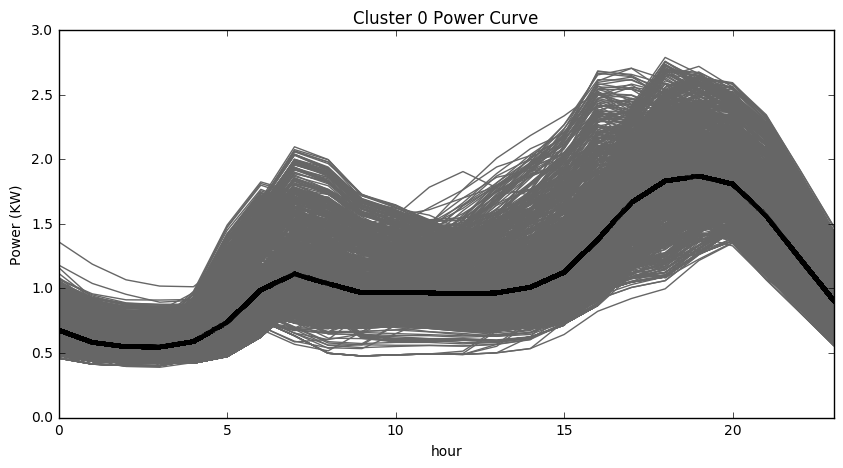

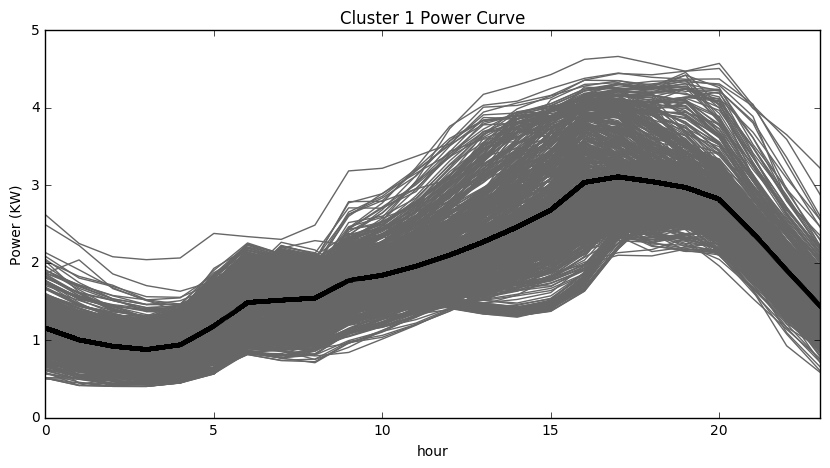

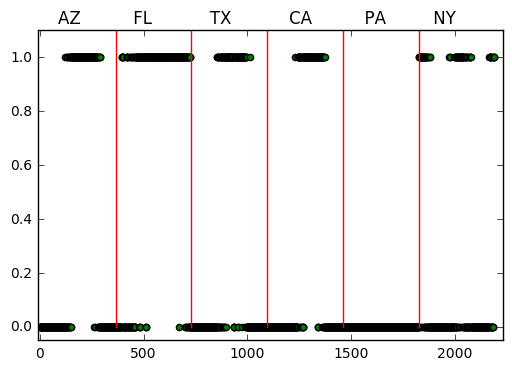

0    224
1    141
Name: Cluster, dtype: int64 1    268
0     97
Name: Cluster, dtype: int64 0    247
1    118
Name: Cluster, dtype: int64 0    249
1    116
Name: Cluster, dtype: int64 0    365
Name: Cluster, dtype: int64 0    267
1     98
Name: Cluster, dtype: int64


In [37]:
#Setting up dataframe to cluster the diffenent locations by hour
elec_hour_az = df.groupby(['doy','hour'])['AZ_Elec'].mean().unstack()
elec_hour_fl = df.groupby(['doy','hour'])['FL_Elec'].mean().unstack()
elec_hour_tx = df.groupby(['doy','hour'])['TX_Elec'].mean().unstack()
elec_hour_ca = df.groupby(['doy','hour'])['CA_Elec'].mean().unstack()
elec_hour_pa = df.groupby(['doy','hour'])['PA_Elec'].mean().unstack()
elec_hour_ny = df.groupby(['doy','hour'])['NY_Elec'].mean().unstack()

frames = [elec_hour_az,elec_hour_fl,elec_hour_tx,elec_hour_ca,elec_hour_pa,elec_hour_ny]

elec_total = pd.concat(frames)

#Checking to see if we have null values in our dataframe before clustering
null = pd.isnull(elec_total).sum()
#looks like we have 12, so we will need to locate them and take a look to see how to interpolate them
null_loc = elec_total[pd.isnull(elec_total).any(axis=1)]
#looks like we can do a linear interpolation
elec_total1 = elec_total.interpolate(method='linear')

l = np.array(range(len(elec_total)))
elec_total1 = elec_total1.set_index(l)

model = KMeans(n_clusters=2)
model.fit(elec_total1)
m = model.labels_
c = model.cluster_centers_
elec_total1['Cluster'] = m
elec_total0 = elec_total1.drop(elec_total1.columns[24], axis=1)

plt.figure(1, figsize=(10,5))
plt.xlabel('Hours in Day')
plt.ylabel('Power (KW)')
plt.title('Cluster 0 Power Curve')
for i in range(len(elec_total)):
    if elec_total1['Cluster'][i] == 0:
        row = elec_total0.iloc[i]
        row.plot(color='0.4')
        plt.plot(range(24),c[0], linewidth=3, color='k')
plt.figure(2, figsize=(10,5))
plt.xlabel('Hours in Day')
plt.ylabel('Power (KW)')
plt.title('Cluster 1 Power Curve')
for j in range(len(elec_total)):
    if elec_total1['Cluster'][j] == 1:
        row = elec_total0.iloc[j]
        row.plot(color='0.4')
        plt.plot(range(24),c[1], linewidth=3, color='k')
plt.show()

#This scatter represents which load curves were assigned to each cluster
y = np.array(elec_total1['Cluster'])
plt.figure(1)
plt.scatter(l,y,marker='o',c='g')
plt.plot((365,365),(0,1.2),'r')
plt.plot((730,730),(0,1.2),'r')
plt.plot((1095,1095),(0,1.2),'r')
plt.plot((1460,1460),(0,1.2),'r')
plt.plot((1825,1825),(0,1.2),'r')
plt.ylim((-.05,1.1))
plt.xlim((-10,2230))
plt.title('AZ          FL           TX           CA          PA         NY     ')
plt.show(1)

az_count = elec_total1['Cluster'][0:365].value_counts()
fl_count = elec_total1['Cluster'][365:(365*2)].value_counts()
tx_count = elec_total1['Cluster'][(365*2):(365*3)].value_counts()
ca_count = elec_total1['Cluster'][(365*3):(365*4)].value_counts()
pa_count = elec_total1['Cluster'][(365*4):(365*5)].value_counts()
ny_count = elec_total1['Cluster'][(365*5):(365*6)].value_counts()
print(az_count,fl_count,tx_count,ca_count,pa_count,ny_count)


Sections split up by location -
1=Arizona, 2=Florida, 3=Texas, 4=California, 5=Pennsylvania, 6=New York

Looking at the first cluster attempt without adjusting for seasonal variation, there looks to be some seasonal effects. The three locations in the hot regions of Texas, Arizona, and California show many instances of a high morning peak during the summer season, which makes sense probably due morning cooling loads. Pennsylvania (section 5 - gas water heating) fully clusters into the group with lower morning peaks, which makes sense. Florida shows the most instances of high morning peaks because they use electric water heating.  I was unable to seperate out New York (the other state with electric water heating) due to many factors.  The first one can be seen below.  The load patterns of states in the southwest vary quite a lot seasonally.

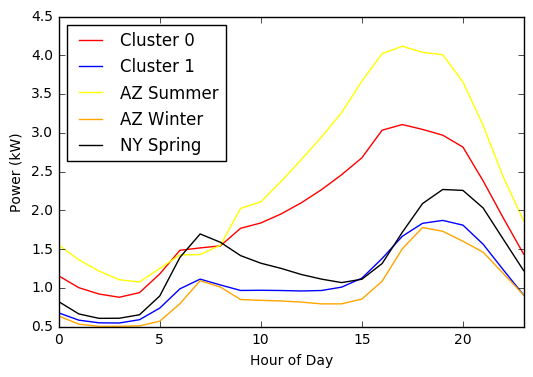

In [21]:
#Lets plot the variation in load curves from season to season for Arizona (1 summer and 1 winter) as well as a New York spring 
#day to try to understand the clustering arrangements
plt.figure(1)
plt.plot(c[0],'r',label='Cluster 0')
plt.plot(c[1],'b',label='Cluster 1')
plt.plot(elec_total0.ix[200], 'yellow',label='AZ Summer')
plt.plot(elec_total0.ix[10], 'orange', label='AZ Winter')
plt.plot(elec_total0.ix[1900], 'black', label='NY Spring')
plt.xlabel('Hour of Day')
plt.ylabel('Power (kW)')
plt.legend(loc=2)
plt.xlim(0,23)
plt.show(1)

The blue and red lines are the two cluster centers. The orange and yellow lines represent Arizona in the winter and summer.  And the black line represents New York in the spring. The fact that the summer days in the southwest grouped with the higher early peak makes sense looking at this figure. New York still displays a nice early peak representing electric water heating, however, the afternoon peak is very low relatively due to cool spring and fall weather, which forces it to cluster with the blue and orange curves, which is not ideal.  The only times that New York clusters into the "correct" bin is during the winter (really high early peak) or during the summer when the second peak is high enough due to cooling loads.

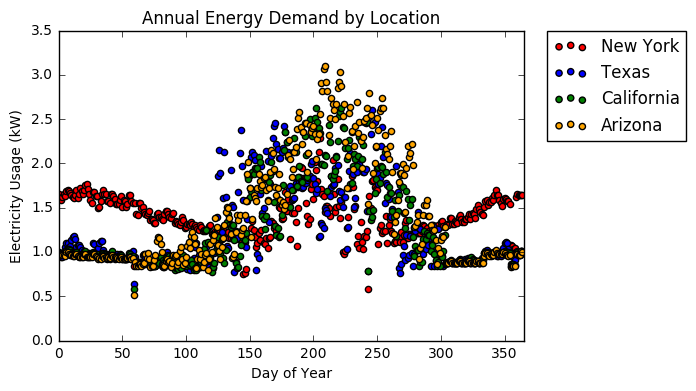

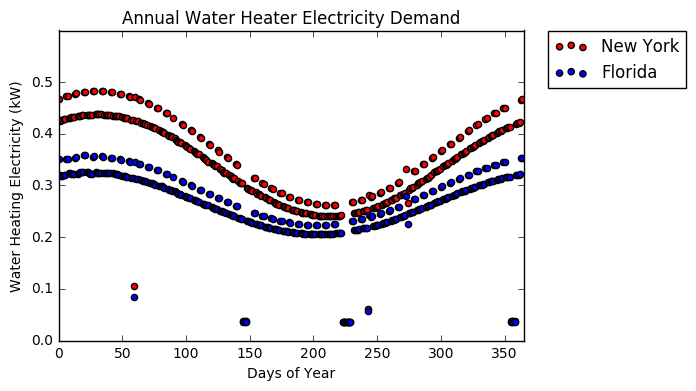

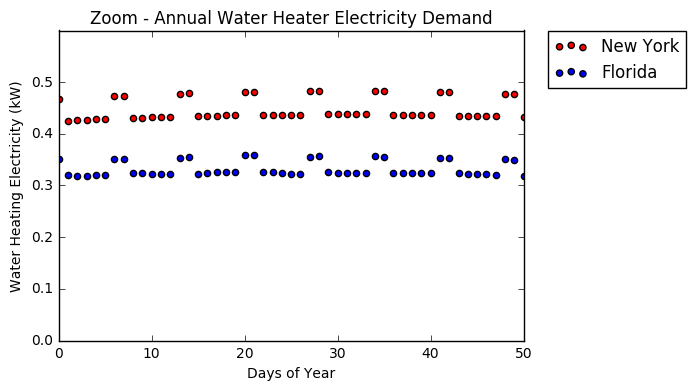

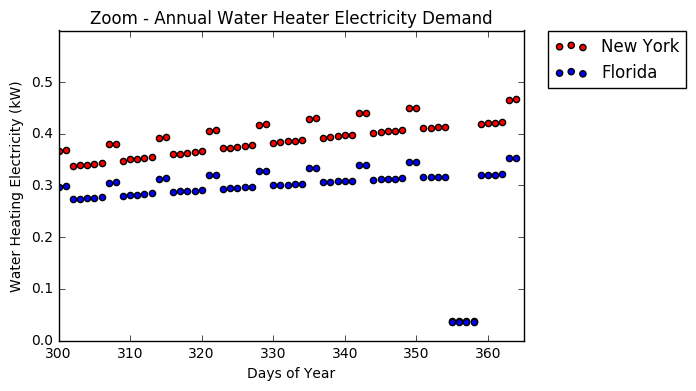

In [40]:
#interesting to see how energy usage varied by location
plt.figure(2)
y = np.array(cy['NY_Elec'])
y1 = np.array(cy['TX_Elec'])
y2 = np.array(cy['CA_Elec'])
y3 = np.array(cy['AZ_Elec'])
x = np.arange(365)

plt.scatter(x,y,c='r',marker='o',label='New York')
plt.scatter(x,y1,c='b',marker='o',label='Texas')
plt.scatter(x,y2,c='g',marker='o',label='California')
plt.scatter(x,y3,c='orange',marker='o',label='Arizona')
plt.xlabel('Day of Year')
plt.ylabel('Electricity Usage (kW)')
plt.legend(borderaxespad=0,bbox_to_anchor=(1.35, 1))
plt.xlim(0,365)
plt.title('Annual Energy Demand by Location')
plt.show(2)

#looks like there is a clear difference in electricity demand for electric water heating on the weekends.
plt.figure(3)
y6 = np.array(cy['NY_wh'])
y7 = np.array(cy['FL_wh'])
plt.scatter(x,y6,c='r',label='New York')
plt.scatter(x,y7,c='b',label='Florida')
plt.xlabel('Days of Year')
plt.ylabel('Water Heating Electricity (kW)')
plt.xlim(0,365)
plt.ylim(0,0.6)
plt.legend(borderaxespad=0,bbox_to_anchor=(1.35, 1))
plt.title('Annual Water Heater Electricity Demand')
plt.show(3)

#Lets zoom in here
plt.figure(4)
y6 = np.array(cy['NY_wh'])
y7 = np.array(cy['FL_wh'])
plt.scatter(x,y6,c='r',label='New York')
plt.scatter(x,y7,c='b',label='Florida')
plt.xlabel('Days of Year')
plt.ylabel('Water Heating Electricity (kW)')
plt.xlim(0,50)
plt.ylim(0,0.6)
plt.legend(borderaxespad=0,bbox_to_anchor=(1.35, 1))
plt.title('Zoom - Annual Water Heater Electricity Demand')
plt.show(4)

#what about over the winter holiday
plt.figure(4)
y6 = np.array(cy['NY_wh'])
y7 = np.array(cy['FL_wh'])
plt.scatter(x,y6,c='r',label='New York')
plt.scatter(x,y7,c='b',label='Florida')
plt.xlabel('Days of Year')
plt.ylabel('Water Heating Electricity (kW)')
plt.xlim(300,365)
plt.ylim(0,0.6)
plt.legend(borderaxespad=0,bbox_to_anchor=(1.35, 1))
plt.title('Zoom - Annual Water Heater Electricity Demand')
plt.show(4)

Looks like the water heating electricity consumption is always higher on the weekend.  And very low during the holiday week. The scatter plot seems very nice and symmetric.  Maybe because of the daily averaging and that water heating is pretty constant day to day.

Since we see solar radiation vary from season to season and by location, I will try to train a regression tree with five locations (California, New York, Texas, Florida, and Pennsylvania) with inputs of "Month", "Hour", "Latitude", and "Longitude". Once the regression tree is trained, I will use the Arizona data as a "test" data set to see how well it predicts. Since the sample size if very small (five) for latidude and longitude, I would hypothesize that these inputs will not be very valuable.

In [41]:
#In this section, I will set up and train my regression tree with the different datasets. I will also print out my importance
#factors and R-Squared values.
from sklearn import tree

data_gen['CA_lat'] = 34.3
data_gen['TX_lat'] = 32.4
data_gen['AZ_lat'] = 32.7
data_gen['FL_lat'] = 24.6
data_gen['NY_lat'] = 40.8
data_gen['PA_lat'] = 40.5

data_gen['CA_long'] = -116.2
data_gen['TX_long'] = -99.9
data_gen['AZ_long'] = -114.6
data_gen['FL_long'] = -81.8
data_gen['NY_long'] = -73.9
data_gen['PA_long'] = -80.2

frames1 = [data_gen['power_CA'],data_gen['power_TX'],data_gen['power_FL'],data_gen['power_NY'],data_gen['power_PA']]
frames2 = [data_gen['CA_lat'],data_gen['TX_lat'],data_gen['FL_lat'],data_gen['NY_lat'],data_gen['PA_lat']]
frames3 = [data_gen['CA_long'],data_gen['TX_long'],data_gen['FL_long'],data_gen['NY_long'],data_gen['PA_long']]

df1 = pd.concat(frames1)
df2 = pd.concat(frames2)
df3 = pd.concat(frames3)

df1 = pd.DataFrame(df1)
df1['power'] = df1[0]
df2 = pd.DataFrame(df2)
df2['lat'] = df2[0]
df3 = pd.DataFrame(df3)
df3['long'] = df3[0]
       
df_new = pd.concat([df1['power'],df2['lat'],df3['long']], axis=1, join='inner')
df_new['Month'] = df1.index.month
df_new['Hour'] = df1.index.hour

reg = tree.DecisionTreeRegressor()
reg = reg.fit(df_new[['Month','Hour','lat','long']], df_new['power'])
print("Feature Importance for Month {}".format(round(reg.feature_importances_[0],3)))
print("Feature Importance for Hour {}".format(round(reg.feature_importances_[1],3)))
print("Feature Importance for Latitude {}".format(round(reg.feature_importances_[2],3)))
print("Feature Importance for Longitude {}".format(round(reg.feature_importances_[3],3)))
print("R-squared value for model is {}".format(round(reg.score(df_new[['Month','Hour','lat','long']], df_new['power']),5)))

frames_test = [data_gen['power_AZ'],data_gen['AZ_lat'], data_gen['AZ_long']]
test_data = pd.concat(frames_test, axis=1)
test_df = pd.DataFrame(test_data)
test_df['Month'] = test_df.index.month
test_df['Hour'] = test_df.index.hour


Feature Importance for Month 0.036
Feature Importance for Hour 0.896
Feature Importance for Latitude 0.052
Feature Importance for Longitude 0.016
R-squared value for model is 0.86599


In [42]:
#Now I will run GridSearchCV with some different parameters to see if I can opmimize the input parameters for the regression tree
#I will use a 10-fold cross validation
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import  cross_val_score

params = {"min_samples_split": [2, 10, 20],
              "max_depth": [None, 10, 20],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 10, 20],
              }

reg_test = tree.DecisionTreeRegressor()
g = GridSearchCV(reg_test, param_grid=params ,cv=10)
g.fit(df_new[['Month','Hour','lat','long']], df_new['power'])

print(g.best_estimator_)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


In [43]:
#I will now use the parameters found above to fit my tree
reg1 = tree.DecisionTreeRegressor(max_depth=20,min_samples_split=20,min_samples_leaf=10, max_leaf_nodes=None)
reg1 = reg1.fit(df_new[['Month','Hour','lat','long']], df_new['power'])
print("Feature Importance for Month {}".format(round(reg1.feature_importances_[0],3)))
print("Feature Importance for Hour {}".format(round(reg1.feature_importances_[1],3)))
print("Feature Importance for Latitude {}".format(round(reg1.feature_importances_[2],3)))
print("Feature Importance for Longitude {}".format(round(reg1.feature_importances_[3],3)))
print("R-squared value for model is {}".format(round(reg1.score(df_new[['Month','Hour','lat','long']], df_new['power']),5)))

Feature Importance for Month 0.036
Feature Importance for Hour 0.896
Feature Importance for Latitude 0.049
Feature Importance for Longitude 0.019
R-squared value for model is 0.86599


Looks like my R-Squared is the same. No need to change the parameters.

I will now use my regression tree and feed in the Arizona input values to see how it predicts the potential solar irradiation. I will plot the data seasonally to see how the predictions compare.

R-squared value for model is 0.85158


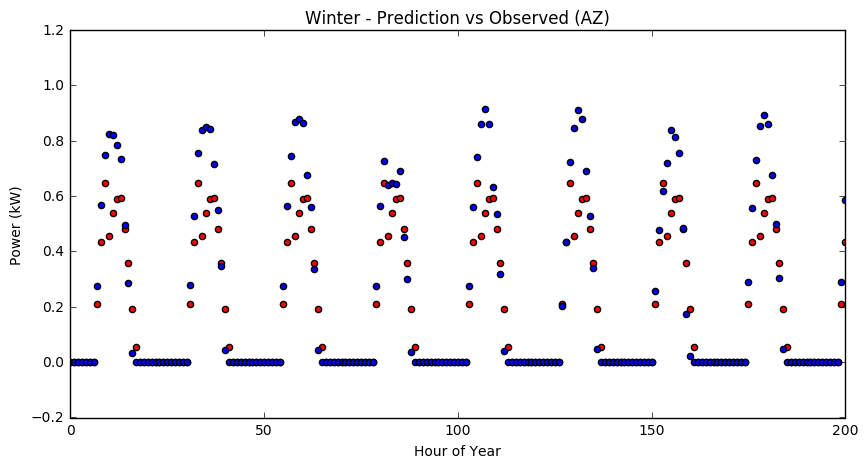

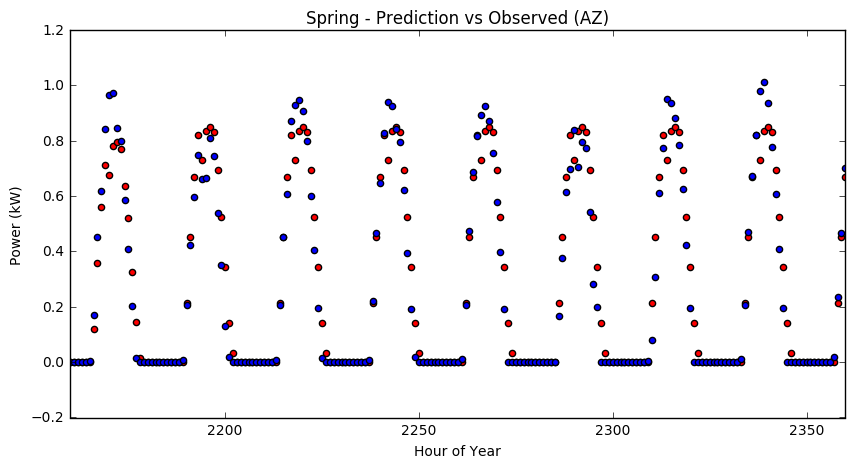

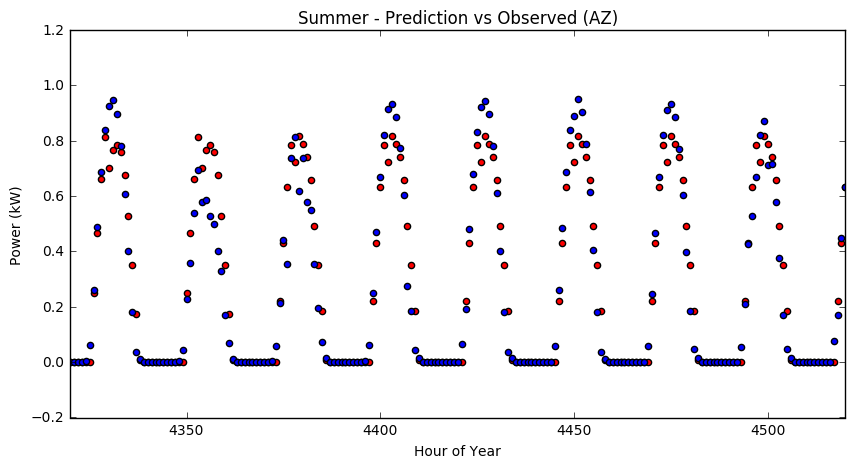

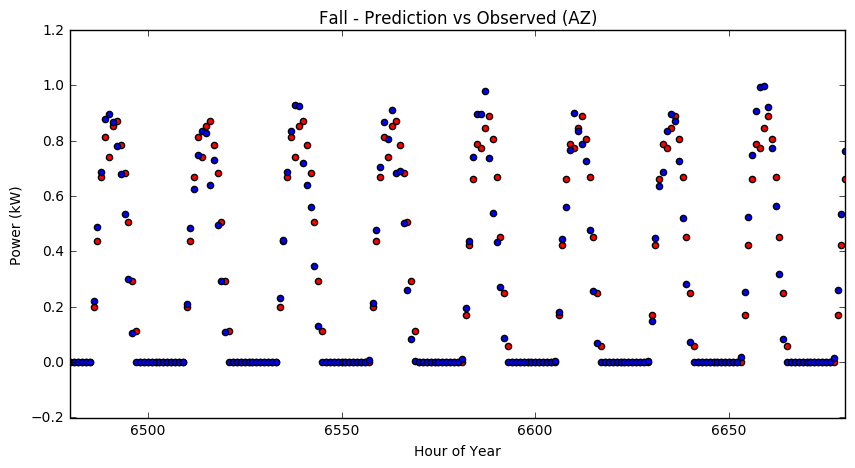

In [44]:
#Feeding in Arizona input values to see how the model predicts the solar irradiation
pr = np.array(reg1.predict(test_df[['Month','Hour','AZ_lat','AZ_long']]))

print("R-squared value for model is {}".format(round(reg1.score(test_df[['Month','Hour','AZ_lat','AZ_long']], test_df['power_AZ']),5)))
#Winter plot
actual = np.array(test_df['power_AZ'])
x = np.array(range(len(pr)))
plt.figure(1, figsize=(10,5))
plt.scatter(x,pr,c='r',label='pred')
plt.scatter(x,actual,c='b',label='obs')
plt.title('Winter - Prediction vs Observed (AZ)')
plt.xlabel('Hour of Year')
plt.ylabel('Power (kW)')
plt.xlim(0,200)
plt.show(1)
#Spring plot
plt.figure(2, figsize=(10,5))
plt.scatter(x,pr,c='r')
plt.scatter(x,actual,c='b')
plt.title('Spring - Prediction vs Observed (AZ)')
plt.xlabel('Hour of Year')
plt.ylabel('Power (kW)')
plt.xlim(2160,2360)
plt.show(2)
#Summer plot
plt.figure(3, figsize=(10,5))
plt.scatter(x,pr,c='r')
plt.scatter(x,actual,c='b')
plt.title('Summer - Prediction vs Observed (AZ)')
plt.xlabel('Hour of Year')
plt.ylabel('Power (kW)')
plt.xlim(4320,4520)
plt.show(3)
#Fall plot
plt.figure(4, figsize=(10,5))
plt.scatter(x,pr,c='r')
plt.scatter(x,actual,c='b')
plt.title('Fall - Prediction vs Observed (AZ)')
plt.xlabel('Hour of Year')
plt.ylabel('Power (kW)')
plt.xlim(6480,6680)
plt.show(4)


From the graphs above, it looks like the winter prediction has the largest errors while the other seasons line up pretty well. The R-Squared for the model is 0.85, which is pretty high.  This is probably because the model can predict all the zero values very well due to the hour of the day. To capture the Arizona potential more accurately, we will need many more training datasets with regional information.